<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:Zahra Ghayour Hallaj

**Student ID**:400101689




## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [171]:
## Import necessary libraries here ##
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [172]:
df = pd.read_csv('Boston.csv')
print(df.columns)
print(df.shape)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
(506, 14)


### Data Description:
The Boston Housing dataset comprises information on housing in different zones, including 13 features and the median value of owner-occupied homes (MDEV) from 506 houses. Here are the details of the features:

* CRIM: Per capita crime rate by town
* ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: Proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds * river; 0 otherwise)
* NOX: Nitric oxide concentration (parts per 10 million)
* RM: Average number of rooms per dwelling
* AGE: Proportion of owner-occupied units built prior to 1940
* DIS: Weighted distances to five Boston employment centers
* RAD: Index of accessibility to radial highways
* TAX: Full-value property-tax rate per $10,000
* PTRATIO: Pupil-teacher ratio by town
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of Black people by town
* LSTAT: Percentage of lower status of the population

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [173]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('MEDV', axis=1)  # Features
y = df['MEDV'] # target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R^2 for train and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE for train and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred,squared=False))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred,squared=False))

# Get the coefficients of the model
coefficients = model.coef_

# Print the results
print("R^2 - Train: {:.4f}, Test: {:.4f}".format(r2_train, r2_test))
print("RMSE - Train: {:.4f}, Test: {:.4f}".format(rmse_train, rmse_test))
print("Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(feature +':', coef)

R^2 - Train: 0.7509, Test: 0.6688
RMSE - Train: 2.1569, Test: 2.2200
Coefficients:
CRIM: -0.11305592398537832
ZN: 0.030110464145646023
INDUS: 0.04038072041333649
CHAS: 2.7844382035079183
NX: -17.20263339178114
RM: 4.438835199513049
AGE: -0.006296362210984044
DIS: -1.4478653685307892
RAD: 0.2624297355850866
TAX: -0.010646786275308184
PTRATIO: -0.9154562404680755
B: 0.012351334729969474
LSTAT: -0.5085714244487942


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

In [174]:
alphas = 10 ** np.linspace(3, -3, 100) * 0.5
# Initialize empty lists to store MSE, R^2, coefficients, and not-considered features
mse_train = []
mse_test = []
r2_scores = []
coefficients = []
not_considered = []

# Train the Ridge Regression model for each value of alpha
for alpha in alphas:
    RidgeModel = Ridge(alpha)
    RidgeModel.fit(X_train, y_train)

    y_train_pred = RidgeModel.predict(X_train)
    y_test_pred = RidgeModel.predict(X_test)

    mse_train.append(mean_squared_error(y_train, y_train_pred,squared=False))
    mse_test.append(mean_squared_error(y_test, y_test_pred,squared=False))
    r2_scores.append(r2_score(y_test, y_test_pred))
    coefficients.append(RidgeModel.coef_)
    not_considered.append(np.sum(np.abs(RidgeModel.coef_)<=np.max(RidgeModel.coef_)/100))


 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

Text(0.5, 1.0, 'Number of Not-Considered Features for Ridge Regression')

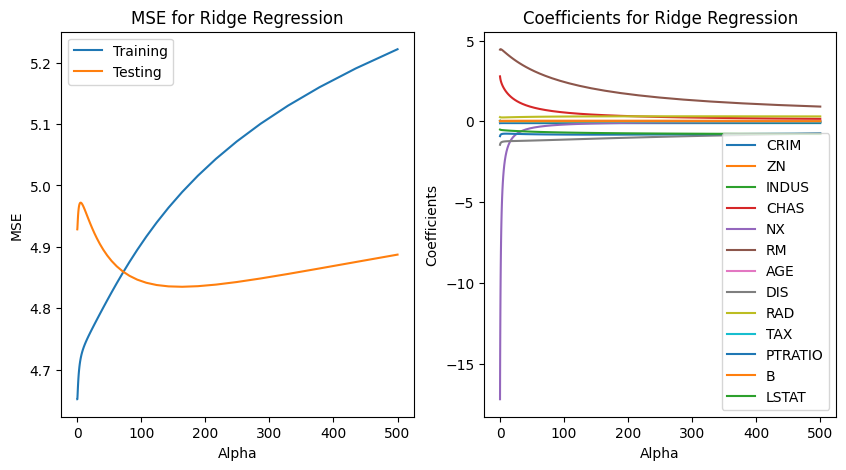

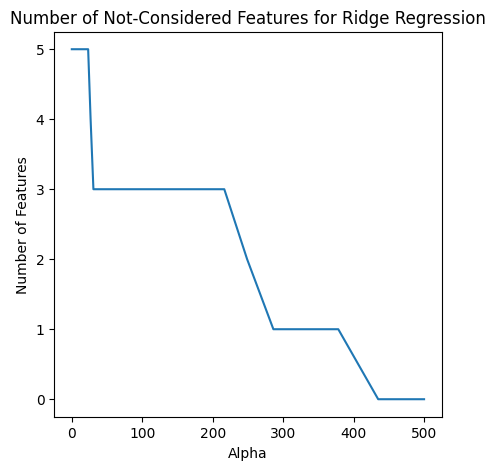

In [175]:
# Plot the MSE for train and test vs. α
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_train, label="Training")
plt.plot(alphas, mse_test, label="Testing")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()
plt.title("MSE for Ridge Regression")

# Plot the coefficients vs. α
coef_array = np.array(coefficients)
plt.subplot(1, 2, 2)
for i in range(coef_array.shape[1]):
    plt.plot(alphas, coef_array[:, i], label=df.columns[i])
plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.legend()
plt.title("Coefficients for Ridge Regression")

# Plot the number of not-considered features vs. α
plt.figure(figsize=(5, 5))
plt.plot(alphas, not_considered, label="Number of Not-Considered Features")
plt.xlabel("Alpha")
plt.ylabel("Number of Features")
plt.title("Number of Not-Considered Features for Ridge Regression")

In [176]:
# Select the optimal value of α
optimal_alpha = alphas[np.argmin(mse_test)]

# Report the MSE, R^2, and coefficients for the selected α
print(f"Optimal Alpha: {optimal_alpha}")
print(f"MSE: {mse_test[np.argmin(mse_test)]:.4f}")
print(f"R^2: {r2_scores[np.argmin(mse_test)]:.4f}")
print("Coefficients:")
print(coefficients[np.argmin(mse_test)])

# Compare with the linear regression case
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

y_train_pred_linear = model_linear.predict(X_train)
y_test_pred_linear = model_linear.predict(X_test)

print(f"Linear Regression MSE(train,test): {mean_squared_error(y_train, y_train_pred_linear,squared=False):.4f}, {mean_squared_error(y_test, y_test_pred_linear,squared=False):.4f}")
print(f"Linear Regression R^2(train,test): {r2_score(y_train, y_train_pred_linear):.4f}, {r2_score(y_test, y_test_pred_linear):.4f}")
print("Linear Regression Coefficients:")
print(model_linear.coef_)

Optimal Alpha: 163.72745814388642
MSE: 4.8351
R^2: 0.6812
Coefficients:
[-0.11058924  0.03996102 -0.0520014   0.38073404 -0.115418    1.89720331
  0.00709776 -1.05241569  0.3094509  -0.01494741 -0.82272188  0.01159841
 -0.72589539]
Linear Regression MSE(train,test): 4.6520, 4.9286
Linear Regression R^2(train,test): 0.7509, 0.6688
Linear Regression Coefficients:
[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]


**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

In [177]:
# Initialize empty lists to store MSE, R^2, coefficients, and not-considered features
mse_train = []
mse_test = []
r2_scores = []
coefficients = []
not_considered = []

# Train the Ridge Regression model for each value of alpha
for alpha in alphas:
    LassoModel = Lasso(alpha)
    LassoModel.fit(X_train, y_train)

    y_train_pred = LassoModel.predict(X_train)
    y_test_pred = LassoModel.predict(X_test)

    mse_train.append(mean_squared_error(y_train, y_train_pred,squared=False))
    mse_test.append(mean_squared_error(y_test, y_test_pred,squared=False))
    r2_scores.append(r2_score(y_test, y_test_pred))
    coefficients.append(LassoModel.coef_)
    not_considered.append(np.sum(np.abs(LassoModel.coef_)<=np.max(RidgeModel.coef_)/100))


Text(0.5, 1.0, 'Number of Not-Considered Features for Lasso Regression')

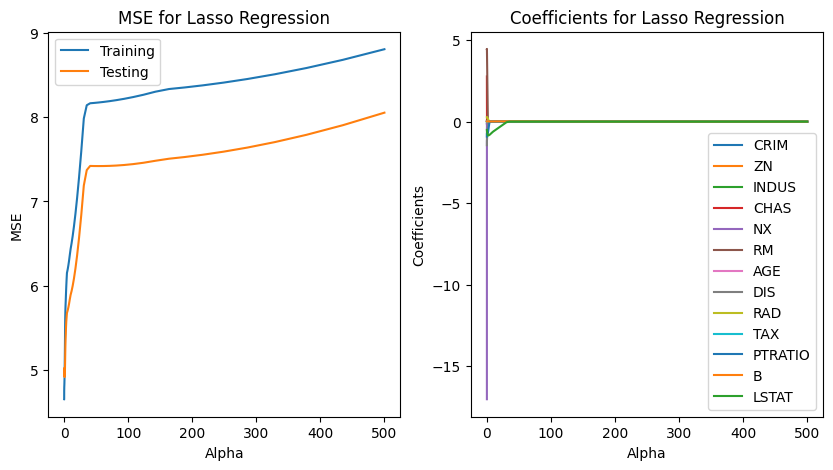

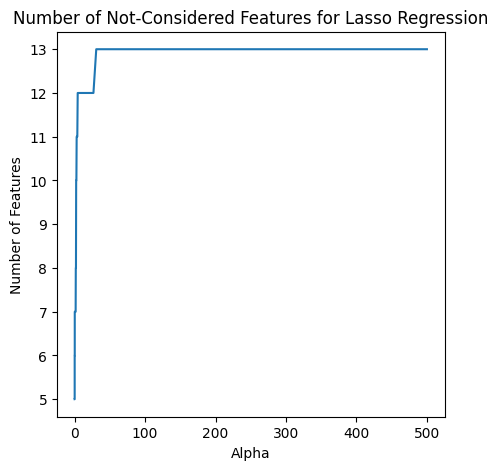

In [178]:
# Plot the MSE for train and test vs. α
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_train, label="Training")
plt.plot(alphas, mse_test, label="Testing")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()
plt.title("MSE for Lasso Regression")

# Plot the coefficients vs. α
coef_array = np.array(coefficients)
plt.subplot(1, 2, 2)
for i in range(coef_array.shape[1]):
    plt.plot(alphas, coef_array[:, i], label=df.columns[i])
plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.legend()
plt.title("Coefficients for Lasso Regression")

# Plot the number of not-considered features vs. α
plt.figure(figsize=(5, 5))
plt.plot(alphas, not_considered, label="Number of Not-Considered Features")
plt.xlabel("Alpha")
plt.ylabel("Number of Features")
plt.title("Number of Not-Considered Features for Lasso Regression")

In [179]:
# Select the optimal value of α
optimal_alpha = alphas[np.argmin(mse_test)]

# Report the MSE, R^2, and coefficients for the selected α
print(f"Optimal Alpha: {optimal_alpha}")
print(f"MSE: {mse_test[np.argmin(mse_test)]:.4f}")
print(f"R^2: {r2_scores[np.argmin(mse_test)]:.4f}")
print("Coefficients:")
print(coefficients[np.argmin(mse_test)])

Optimal Alpha: 0.7087370814634024
MSE: 4.9146
R^2: 0.6706
Coefficients:
[-0.08616746  0.0308067  -0.          0.         -0.          2.50824373
  0.00611413 -0.801558    0.22931102 -0.01270717 -0.72057187  0.01186642
 -0.68953564]


Lasso regression is a powerful regularization technique in linear regression that can be used for automatic feature selection. It adds a constraint to the cost function that takes the absolute value of the coefficients, which can lead to coefficient values becoming zero. This is useful when working with high-dimensional datasets, as it can help narrow down and eliminate some features by pulling feature weights down to zero when the coefficient of a feature gets pulled down to zero.

When to consider using Lasso regression:
* When you want to perform linear regression on a high-dimensional dataset and need to narrow down and eliminate some features.
* When you want to heavily penalize large coefficients and create a model that generalizes better.
* When you want to automatically select features by pulling feature weights down to zero.

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

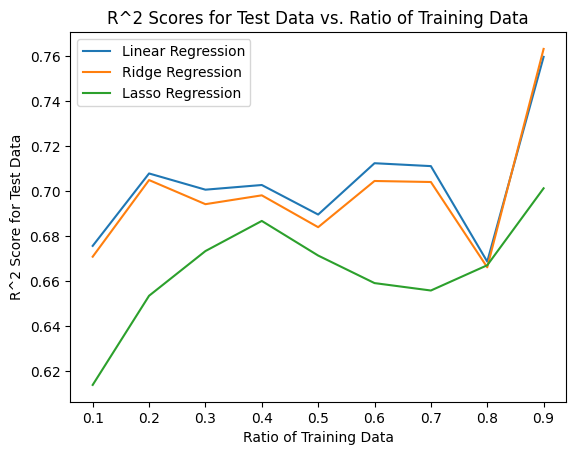

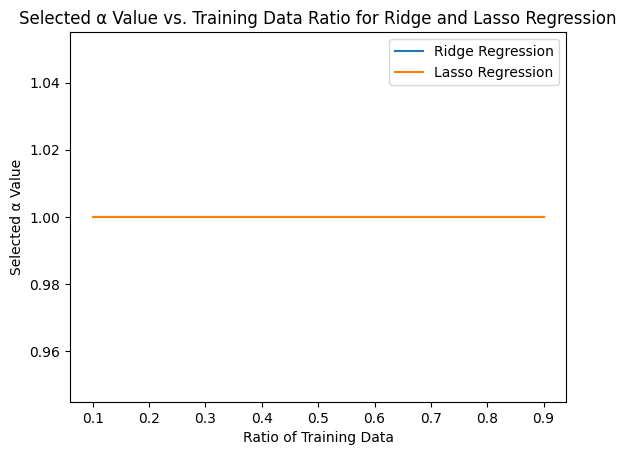

In [180]:
# Define the range of training data ratios
ratios = np.arange(0.1, 1.0, 0.1)

# Initialize arrays to store the R^2 scores and selected α values
r2_scores = np.zeros((3, len(ratios)))
alpha_values = np.zeros((2, len(ratios)))

# Loop over the ratios of training data
for i, ratio in enumerate(ratios):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - ratio, random_state=42)

    # Fit the Linear Regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_test_pred = lin_reg.predict(X_test)
    r2_scores[0, i] = lin_reg.score(X_test, y_test)

    # Fit the Ridge Regression model
    ridge_reg = Ridge()
    ridge_reg.fit(X_train, y_train)
    y_test_pred = ridge_reg.predict(X_test)
    r2_scores[1, i] = ridge_reg.score(X_test, y_test)
    alpha_values[0, i] = ridge_reg.get_params()['alpha']

    # Fit the Lasso Regression model
    lasso_reg = Lasso()
    lasso_reg.fit(X_train, y_train)
    y_test_pred = lasso_reg.predict(X_test)
    r2_scores[2, i] = lasso_reg.score(X_test, y_test)
    alpha_values[1, i] = lasso_reg.get_params()['alpha']

# Plot the R^2 scores for the test data
plt.plot(ratios, r2_scores[0], label='Linear Regression')
plt.plot(ratios, r2_scores[1], label='Ridge Regression')
plt.plot(ratios, r2_scores[2], label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('R^2 Score for Test Data')
plt.legend()
plt.title('R^2 Scores for Test Data vs. Ratio of Training Data')
plt.show()

# Plot the selected α values for Ridge and Lasso Regression
plt.plot(ratios, alpha_values[0], label='Ridge Regression')
plt.plot(ratios, alpha_values[1], label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('Selected α Value')
plt.legend()
plt.title('Selected α Value vs. Training Data Ratio for Ridge and Lasso Regression')
plt.show()


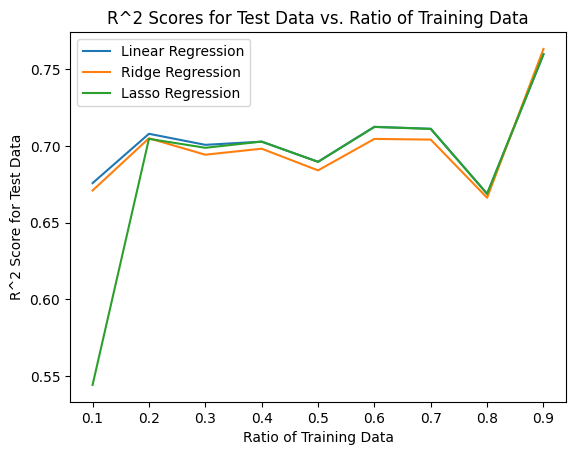

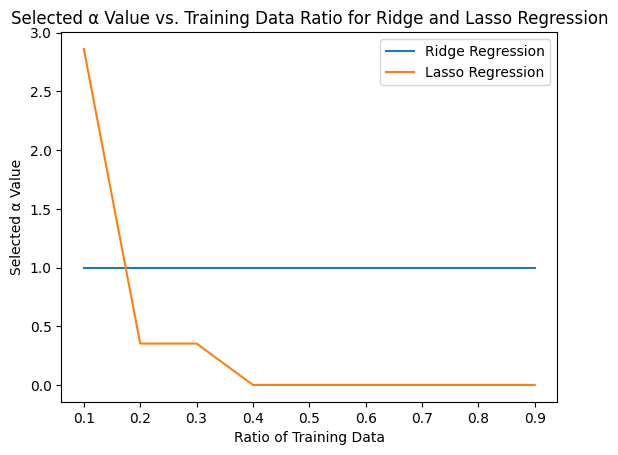

In [181]:
from sklearn.model_selection import GridSearchCV

# Define the range of training data ratios
ratios = np.arange(0.1, 1.0, 0.1)

# Initialize arrays to store the R^2 scores and selected α values
r2_scores = np.zeros((3, len(ratios)))
alpha_values = np.zeros((2, len(ratios)))

# Loop over the ratios of training data
for i, ratio in enumerate(ratios):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - ratio, random_state=42)

    # Fit the Linear Regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_test_pred = lin_reg.predict(X_test)
    r2_scores[0, i] = lin_reg.score(X_test, y_test)

    # Fit the Ridge Regression model
    ridge_reg = Ridge()
    ridge_reg.fit(X_train, y_train)
    y_test_pred = ridge_reg.predict(X_test)
    r2_scores[1, i] = ridge_reg.score(X_test, y_test)
    alpha_values[0, i] = ridge_reg.get_params()['alpha']

    # Fit the Lasso Regression model using cross-validation to select alpha
    lasso_reg = Lasso()
    param_grid = {'alpha': 10 ** np.linspace(3, -3, 100) * 0.5}
    grid_search = GridSearchCV(lasso_reg, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    lasso_reg = grid_search.best_estimator_
    y_test_pred = lasso_reg.predict(X_test)
    r2_scores[2, i] = lasso_reg.score(X_test, y_test)
    alpha_values[1, i] = lasso_reg.get_params()['alpha']

# Plot the R^2 scores for the test data
plt.plot(ratios, r2_scores[0], label='Linear Regression')
plt.plot(ratios, r2_scores[1], label='Ridge Regression')
plt.plot(ratios, r2_scores[2], label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('R^2 Score for Test Data')
plt.legend()
plt.title('R^2 Scores for Test Data vs. Ratio of Training Data')
plt.show()

# Plot the selected α values for Ridge and Lasso Regression
plt.plot(ratios, alpha_values[0], label='Ridge Regression')
plt.plot(ratios, alpha_values[1], label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('Selected α Value')
plt.legend()
plt.title('Selected α Value vs. Training Data Ratio for Ridge and Lasso Regression')
plt.show()

